# Capstone Project 1: EDA

In the following EDA, I try to perfom interesting query against the dataset in order to gain a better understanding of the data and to place it within the context of the business problem contained in the project description.

# Importing Libraries and Loading Our Data

In [23]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

movies = pd.read_csv('Dataset/movies.dat', sep = '::', engine='python',
                     names=['MovieID','Title','Genres'],index_col ='MovieID' )
users = pd.read_csv('Dataset/users.dat', sep = '::', engine='python',
                     names=['UserID','Gender','Age','Occupation','Zip-code'],index_col ='UserID' )
ratings = pd.read_csv('Dataset/ratings.dat', sep = '::', engine='python',
                     names=['UserID','MovieID','Rating','Timestamp'])#,index_col =['UserID','MovieID'] )

# Understanding the Dataset

There are three tables ofr Movies, Users and Ratings.

In [24]:
movies.head() , users.head() , ratings.head()

(                                      Title                        Genres
 MovieID                                                                  
 1                          Toy Story (1995)   Animation|Children's|Comedy
 2                            Jumanji (1995)  Adventure|Children's|Fantasy
 3                   Grumpier Old Men (1995)                Comedy|Romance
 4                  Waiting to Exhale (1995)                  Comedy|Drama
 5        Father of the Bride Part II (1995)                        Comedy,
        Gender  Age  Occupation Zip-code
 UserID                                 
 1           F    1          10    48067
 2           M   56          16    70072
 3           M   25          15    55117
 4           M   45           7    02460
 5           M   25          20    55455,
    UserID  MovieID  Rating  Timestamp
 0       1     1193       5  978300760
 1       1      661       3  978302109
 2       1      914       3  978301968
 3       1     3408       4  9

# Exploratory Data Analysis

I merged all three tables in order to have all data in on table for future analysis and mapped all codes related to "Age" and "Occupation" column for having more understandable data

In [25]:
users_ratings_df = pd.merge(users,ratings,how='inner',on='UserID')
users_ratings_movies_df = pd.merge(users_ratings_df,movies,how='inner',on='MovieID')
users_ratings_movies_df = users_ratings_movies_df[['UserID','Gender','Age','Occupation','Rating','MovieID','Title','Timestamp']]

# Seperate all genre to movie_genres_df dataframe
movie_genres_df = pd.DataFrame(columns=['MovieID','Genre'])
for index,movie in movies.iterrows():
    for genre in movie['Genres'].split('|'):
        movie_genres_df = movie_genres_df.append({'MovieID' : index , 'Genre': genre},ignore_index=True)

        #show how many movie on each genre      
#movie_genres_df.groupby('Genre').count()

age_group_dict = { 1:  "Under 18",18:  "18-24",25:  "25-34",35:  "35-44",45:  "45-49",50:  "50-55",56:  "56+"}

occupation_dict = {  0:  "other or not specified",1:  "academic/educator",2:  "artist",3:  "clerical/admin",
                   4:  "college/grad student",5:  "customer service",6:  "doctor/health care",7:  "executive/managerial",
                   8:  "farmer",9:  "homemaker",10:  "K-12 student",11:  "lawyer",12:  "programmer",13:  "retired",
                   14:  "sales/marketing",15:  "scientist",16:  "self-employed",17:  "technician/engineer",
                   18:  "tradesman/craftsman",19:  "unemployed",20:  "writer"}

users_ratings_movies_df['Age'] = users_ratings_movies_df['Age'].map(age_group_dict)
users_ratings_movies_df['Occupation'] = users_ratings_movies_df['Occupation'].map(occupation_dict)

#Extract just year from timestamp column
users_ratings_movies_df=users_ratings_movies_df.rename(columns = {'Timestamp':'Year'})
users_ratings_movies_df['Year'] = [datetime.fromtimestamp(timestamp).year for timestamp in users_ratings_movies_df['Year'] ] 


users_ratings_movies_df_separated_genre = pd.merge(users_ratings_movies_df,movie_genres_df,how='inner',on='MovieID')
users_ratings_movies_df = pd.merge(users_ratings_movies_df,movies[['Genres']],how='inner',on='MovieID')

users_ratings_movies_df.head()


,UserID,Gender,Age,Occupation,Rating,MovieID,Title,Year,Genres
0,1,F,Under 18,K-12 student,5,1193,One Flew Over the Cuckoo's Nest (1975),2000,Drama
1,2,M,56+,self-employed,5,1193,One Flew Over the Cuckoo's Nest (1975),2000,Drama
2,12,M,25-34,programmer,4,1193,One Flew Over the Cuckoo's Nest (1975),2000,Drama
3,15,M,25-34,executive/managerial,4,1193,One Flew Over the Cuckoo's Nest (1975),2000,Drama
4,17,M,50-55,academic/educator,5,1193,One Flew Over the Cuckoo's Nest (1975),2000,Drama


# Let see  distribution of  movies in each genre

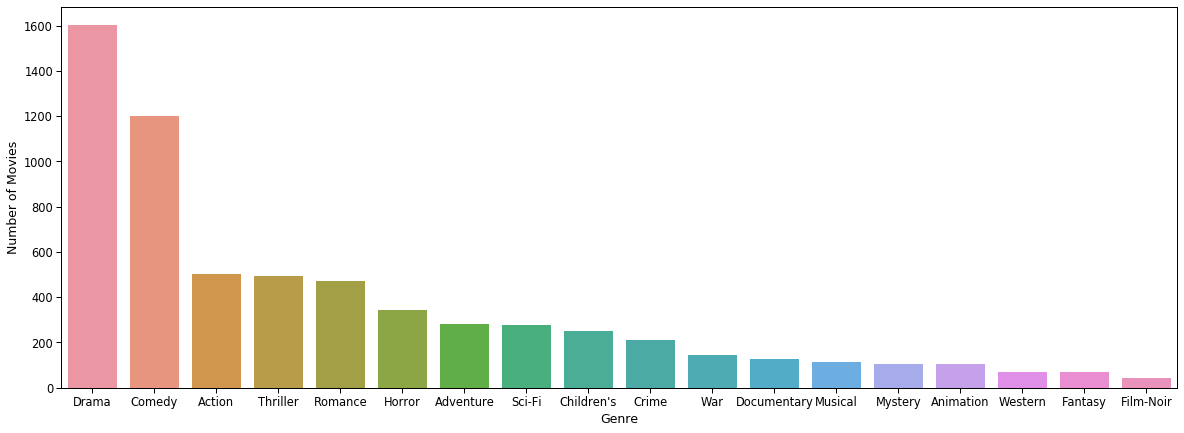

In [32]:
genre_cnt = movie_genres_df['Genre'].value_counts()
sns.set_context("paper", font_scale=1.3)
plt.figure(figsize=(20,7))
ax = sns.barplot(genre_cnt.index, genre_cnt.values)
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Movies')

plt.show()

Two genres(Drama and Comedy) are most popular genre in this dataset.

# Let see  distribution of  users in each age group and in each occupation

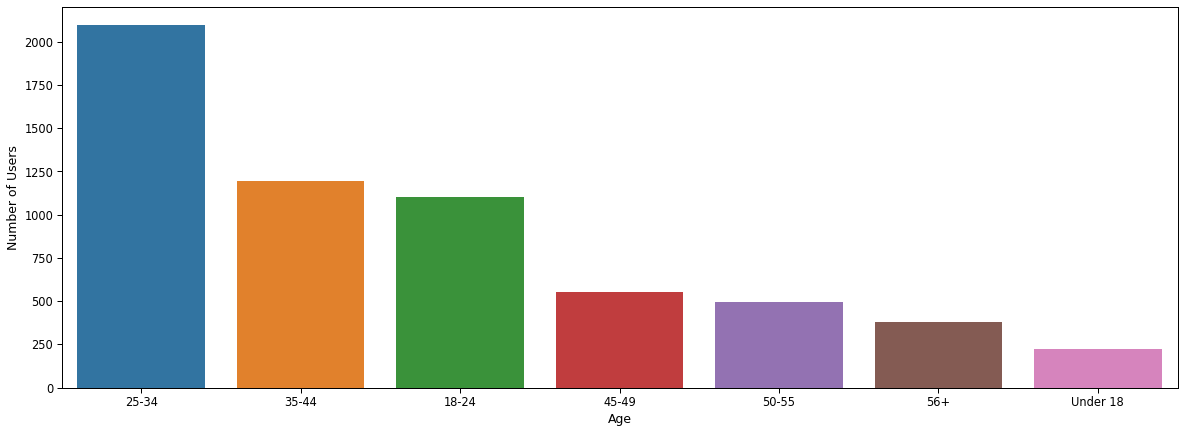

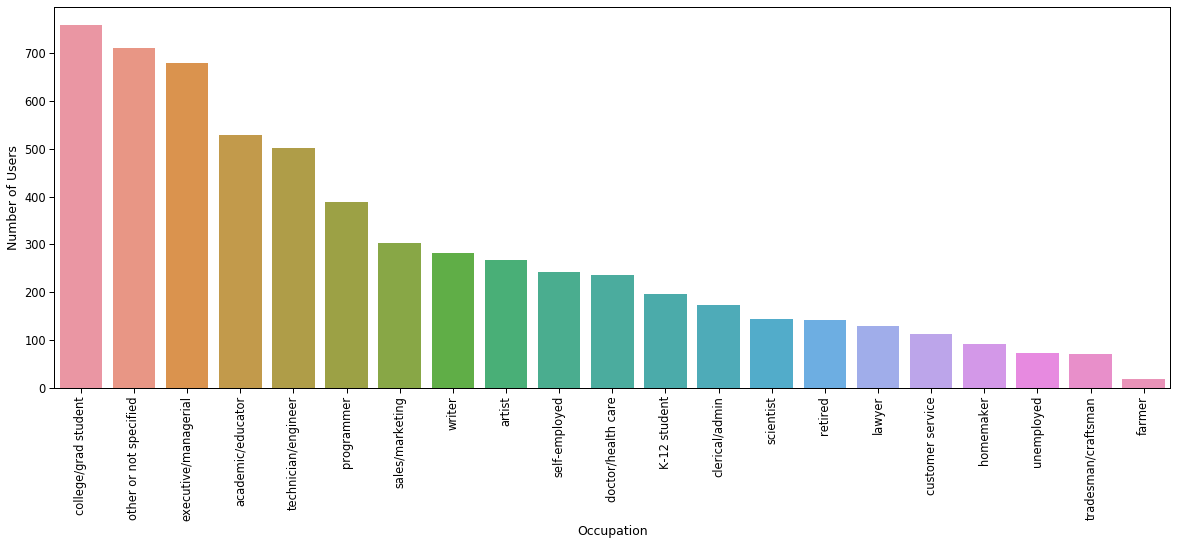

In [27]:
users['Age'] = users['Age'].map(age_group_dict)
user_cnt = users['Age'].value_counts()

plt.figure(figsize=(20,7))
ax = sns.barplot(user_cnt.index, user_cnt.values)
ax.set_xlabel('Age')
ax.set_ylabel('Number of Users')

plt.show()

users['Occupation'] = users['Occupation'].map(occupation_dict)
user_cnt = users['Occupation'].value_counts()

plt.figure(figsize=(20,7))
ax = sns.barplot(user_cnt.index, user_cnt.values)
ax.set_xlabel('Occupation')
ax.set_ylabel('Number of Users')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

Big portion of users are students and around 25 to 34 years old.

# Distribution of ratings

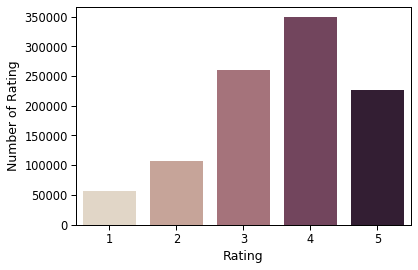

In [37]:
rating_cnt = ratings.groupby('Rating')['Rating']
rating_cnt = rating_cnt.agg({'count'})
rating_cnt.columns = ['Number of Rating']
rating_cnt = rating_cnt.sort_values(['Rating','Number of Rating'],ascending=False).reset_index()
sns.barplot(x="Rating", y="Number of Rating", palette="ch:.25", data=rating_cnt);

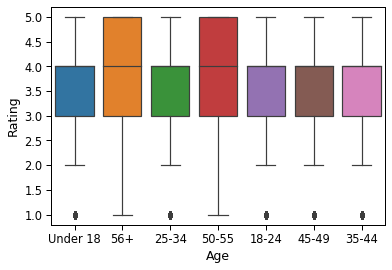

In [36]:
sns.boxplot(x="Age", y="Rating", data=users_ratings_movies_df)

Portion of rating '4' is more than the other ratings and second box plot shows most of age groups has rating between '3' and '4'.

# First 5 most rated (popular) movies in each age group

In [39]:
age_popular_movies_df = users_ratings_movies_df.groupby(['Age','Title'])['Age','Title','Rating']
age_popular_movies_df = age_popular_movies_df.agg({'count','mean'})
age_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
age_popular_movies_df = age_popular_movies_df.sort_values(['Age','Number of Rating', 'Average of Rating'],ascending=False)
age_popular_movies_df.groupby(level=0).head()

Number of Rating  \
Age      Title                                                                  
Under 18 Toy Story (1995)                                                 112   
         Sixth Sense, The (1999)                                          109   
         Star Wars: Episode IV - A New Hope (1977)                        101   
         Star Wars: Episode VI - Return of the Jedi (1983)                100   
         Men in Black (1997)                                              100   
56+      American Beauty (1999)                                           184   
         Schindler's List (1993)                                          137   
         Shakespeare in Love (1998)                                       136   
         Godfather, The (1972)                                            122   
         Saving Private Ryan (1998)                                       121   
50-55    American Beauty (1999)                                           248   
         Star Wars: Episode IV - A New Hope (1977)                        215   
         Star Wars: Episode V - The Empire Strikes Back ...               206   
         Fargo (1996)                                                     199   
         Godfather, The (1972)                                            198   
45-49    American Beauty (1999)                                           258   
         Star Wars: Episode IV - A New Hope (1977)                        243   
         Star Wars: Episode V - The Empire Strikes Back ...               226   
         Jurassic Park (1993)                                             218   
         Shakespeare in Love (1998)                                       217   
35-44    Star Wars: Episode IV - A New Hope (1977)                        626   
         Star Wars: Episode V - The Empire Strikes Back ...               598   
         American Beauty (1999)                                           597   
         Star Wars: Episode VI - Return of the Jedi (1983)                550   
         Back to the Future (1985)                                        525   
25-34    American Beauty (1999)                                          1334   
         Star Wars: Episode V - The Empire Strikes Back ...              1176   
         Star Wars: Episode VI - Return of the Jedi (1983)               1134   
         Star Wars: Episode IV - A New Hope (1977)                       1128   
         Terminator 2: Judgment Day (1991)                               1087   
18-24    American Beauty (1999)                                           715   
         Star Wars: Episode VI - Return of the Jedi (1983)                586   
         Star Wars: Episode V - The Empire Strikes Back ...               579   
         Matrix, The (1999)                                               567   
         Star Wars: Episode IV - A New Hope (1977)                        562   

                                                             Average of Rating  
Age      Title                                                                  
Under 18 Toy Story (1995)                                             3.919643  
         Sixth Sense, The (1999)                                      4.275229  
         Star Wars: Episode IV - A New Hope (1977)                    4.267327  
         Star Wars: Episode VI - Return of the Jedi (1983)            4.130000  
         Men in Black (1997)                                          3.840000  
56+      American Beauty (1999)                                       4.108696  
         Schindler's List (1993)                                      4.620438  
         Shakespeare in Love (1998)                                   4.117647  
         Godfather, The (1972)                                        4.467213  
         Saving Private Ryan (1998)                                   4.438017  
50-55    American Beauty (1999)                                       4.149194  
         S

# First 5 most rated (popular) movies in each occupation group

In [40]:
occupation_popular_movies_df = users_ratings_movies_df.groupby(['Occupation','Title'])['Occupation','Title','Rating']
occupation_popular_movies_df = occupation_popular_movies_df.agg({'count','mean'})
occupation_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
occupation_popular_movies_df = occupation_popular_movies_df.sort_values(['Occupation','Number of Rating', 'Average of Rating'],ascending=False)
occupation_popular_movies_df.groupby(level=0).head()

Number of Rating  \
Occupation           Title                                                                  
writer               American Beauty (1999)                                           181   
                     Star Wars: Episode V - The Empire Strikes Back ...               153   
                     L.A. Confidential (1997)                                         143   
                     Fargo (1996)                                                     142   
                     Being John Malkovich (1999)                                      139   
unemployed           American Beauty (1999)                                            48   
                     Matrix, The (1999)                                                43   
                     Star Wars: Episode IV - A New Hope (1977)                         41   
                     Star Wars: Episode VI - Return of the Jedi (1983)                 40   
                     Fargo (1996)                                                      39   
tradesman/craftsman  American Beauty (1999)                                            38   
                     Star Wars: Episode IV - A New Hope (1977)                         35   
                     Saving Private Ryan (1998)                                        34   
                     Jurassic Park (1993)                                              34   
                     Silence of the Lambs, The (1991)                                  33   
technician/engineer  Star Wars: Episode V - The Empire Strikes Back ...               271   
                     Terminator 2: Judgment Day (1991)                                271   
                     Star Wars: Episode IV - A New Hope (1977)                        270   
                     Star Wars: Episode VI - Return of the Jedi (1983)                259   
                     Matrix, The (1999)                                               258   
self-employed        American Beauty (1999)                                           149   
                     Star Wars: Episode IV - A New Hope (1977)                        115   
                     Star Wars: Episode VI - Return of the Jedi (1983)                115   
                     Star Wars: Episode V - The Empire Strikes Back ...               114   
                     Silence of the Lambs, The (1991)                                 111   
scientist            Star Wars: Episode V - The Empire Strikes Back ...                88   
                     Star Wars: Episode IV - A New Hope (1977)                         85   
                     American Beauty (1999)                                            84   
                     Raiders of the Lost Ark (1981)                                    75   
                     Princess Bride, The (1987)                                        75   
...                                                                                   ...   
customer service     American Beauty (1999)                                            66   
                     Star Wars: Episode IV - A New Hope (1977)                         62   
                     Terminator 2: Judgment Day (1991)                                 60   
                     Star Wars: Episode V - The Empire Strikes Back ...                59   
                     Jurassic Park (1993)                                              59   
college/grad student American Beauty (1999)                                           519   
                     Star Wars: Episode VI - Return of the Jedi (1983)                421   
                     Star Wars: Episode V - The Empire Strikes Back ...               411   
                     Saving Private Ryan (1998)                                       405   
                     Star Wars: Episode IV - A New Hope (1977)                        400   
clerical/admin       American Beauty (1999)                               

# First 5 most rated (popular) movies in each Age&Sex group

In [41]:
age_Gender_popular_movies_df = users_ratings_movies_df.groupby(['Age','Gender','Title'])['Age','Gender','Title','Rating']
age_Gender_popular_movies_df = age_Gender_popular_movies_df.agg({'count','mean'})
age_Gender_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
age_Gender_popular_movies_df = age_Gender_popular_movies_df.sort_values(['Age','Gender','Number of Rating', 'Average of Rating'],ascending=False)
age_Gender_popular_movies_df.groupby(level=[0,1]).head()

Number of Rating  \
Age      Gender Title                                                                  
Under 18 M      Matrix, The (1999)                                                82   
                Sixth Sense, The (1999)                                           78   
                Star Wars: Episode IV - A New Hope (1977)                         76   
                Star Wars: Episode VI - Return of the Jedi (1983)                 74   
                Toy Story (1995)                                                  73   
         F      Toy Story (1995)                                                  39   
                Toy Story 2 (1999)                                                36   
                Aladdin (1992)                                                    36   
                Babe (1995)                                                       34   
                Shakespeare in Love (1998)                                        33   
56+      M      American Beauty (1999)                                           130   
                Schindler's List (1993)                                           95   
                Star Wars: Episode V - The Empire Strikes Back ...                94   
                Star Wars: Episode IV - A New Hope (1977)                         93   
                Shakespeare in Love (1998)                                        93   
         F      American Beauty (1999)                                            54   
                Shakespeare in Love (1998)                                        43   
                Schindler's List (1993)                                           42   
                One Flew Over the Cuckoo's Nest (1975)                            39   
                Gone with the Wind (1939)                                         38   
50-55    M      American Beauty (1999)                                           181   
                Star Wars: Episode IV - A New Hope (1977)                        164   
                Star Wars: Episode V - The Empire Strikes Back ...               162   
                Terminator 2: Judgment Day (1991)                                154   
                Jurassic Park (1993)                                             151   
         F      American Beauty (1999)                                            67   
                Shakespeare in Love (1998)                                        59   
                Fargo (1996)                                                      56   
                L.A. Confidential (1997)                                          52   
                Godfather, The (1972)                                             51   
...                                                                              ...   
35-44    M      Star Wars: Episode IV - A New Hope (1977)                        486   
                Star Wars: Episode V - The Empire Strikes Back ...               456   
                American Beauty (1999)                                           435   
                Terminator 2: Judgment Day (1991)                                427   
                Star Wars: Episode VI - Return of the Jedi (1983)                415   
         F      American Beauty (1999)                                           162   
                Shakespeare in Love (1998)                                       157   
                Silence of the Lambs, The (1991)                                 155   
                Star Wars: Episode V - The Empire Strikes Back ...               142   
                Star Wars: Episode IV - A New Hope (1977)                        140   
25-34    M      American Beauty (1999)                                           973   
                Star Wars: Episode V - The Empire Strikes Back ...               929   
                Terminator 2: Judgment Day (1991)                                900   
                Star

 # First 5 most rated (popular) genre in each Year

In [42]:
genre_year_popular_movies_df = users_ratings_movies_df_separated_genre.groupby(['Year','Genre'])['Rating']

genre_year_popular_movies_df = genre_year_popular_movies_df.agg({'count','mean'})
genre_year_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
genre_year_popular_movies_df = genre_year_popular_movies_df.sort_values(['Year','Number of Rating', 'Average of Rating'],ascending=False)
genre_year_popular_movies_df = genre_year_popular_movies_df.groupby(level=0).head()
genre_year_popular_movies_df

Number of Rating  Average of Rating
Year Genre                                        
2003 Comedy                1261           3.406820
     Drama                 1249           3.686149
     Action                 670           3.376119
     Thriller               521           3.431862
     Romance                499           3.573146
2002 Drama                 9192           3.658072
     Comedy                8665           3.367109
     Action                4542           3.305812
     Thriller              4016           3.421813
     Romance               3569           3.507985
2001 Drama                25239           3.709616
     Comedy               25140           3.441925
     Action               14028           3.377958
     Thriller             12237           3.473400
     Romance               9638           3.538701
2000 Comedy              321514           3.532997
     Drama               318849           3.774257
     Action              238217           3.501711
     Thriller            172906           3.581206
     Sci-Fi              146090           3.477521

# Distribution of rating of most 5 popular genres in each age group

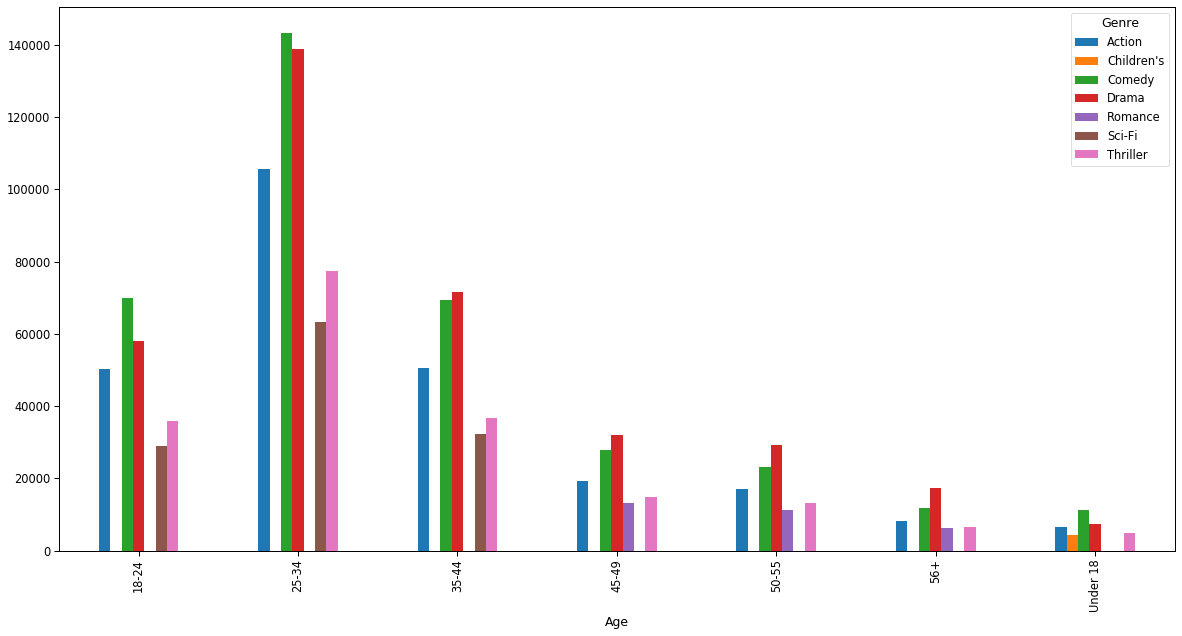

In [43]:
age_genre_movies_df = users_ratings_movies_df_separated_genre.groupby(['Age','Genre'])['Rating']
age_genre_movies_df = age_genre_movies_df.agg({'count','mean'})
age_genre_movies_df.columns = ['Number of Rating', 'Average of Rating']
age_genre_movies_df = age_genre_movies_df.sort_values(['Age','Number of Rating', 'Average of Rating'],ascending=False)
age_genre_movies_df = age_genre_movies_df.groupby(level=0).head()

dist_age_genre_movies_df = age_genre_movies_df.reset_index()
dist_age_genre_movies_df = dist_age_genre_movies_df.pivot_table(index='Age',columns='Genre',values='Number of Rating')
dist_age_genre_movies_df.plot.bar(figsize=(20,10)) 

Genre 'Comedy' is more popular for ages under 34

# Comparison of rating of each genre in each gender

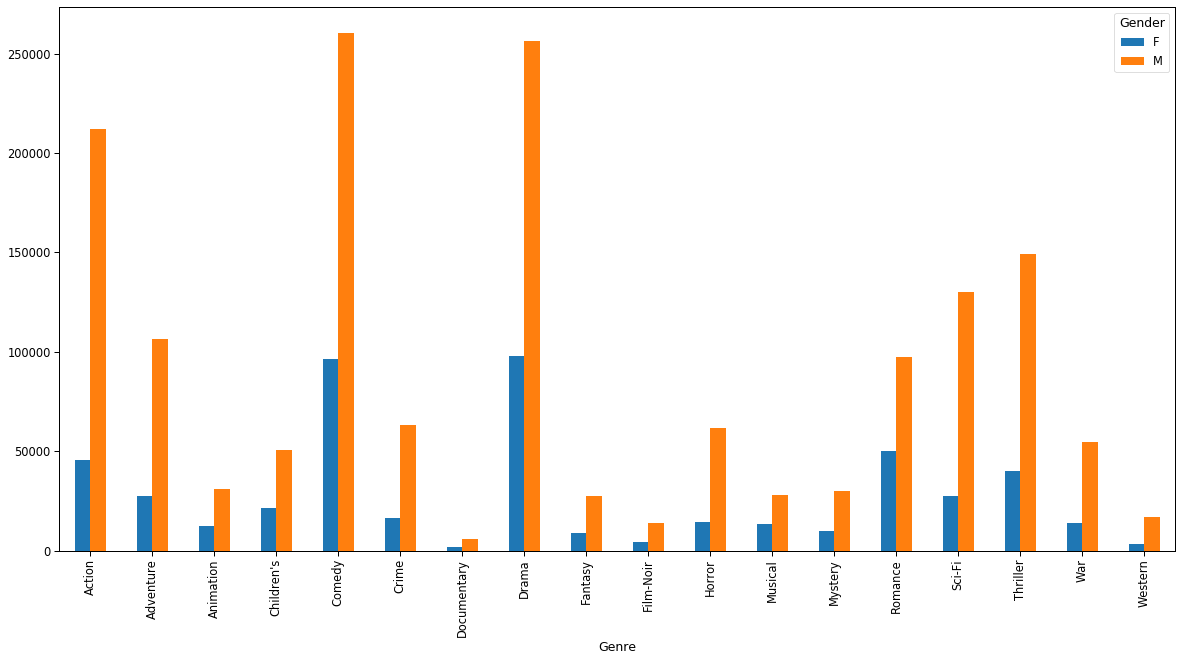

In [44]:
gender_genre_movies_df = users_ratings_movies_df_separated_genre.groupby(['Genre','Gender'])['Rating']
gender_genre_movies_df = gender_genre_movies_df.agg({'count','mean'})
gender_genre_movies_df.columns = ['Number of Rating', 'Average of Rating']
gender_genre_movies_df = gender_genre_movies_df.sort_values(['Genre','Number of Rating', 'Average of Rating'],ascending=False)

dist_gender_genre_movies_df = gender_genre_movies_df.reset_index()
dist_gender_genre_movies_df = dist_gender_genre_movies_df.pivot_table(index='Genre',columns='Gender',values='Number of Rating')
dist_gender_genre_movies_df.plot.bar(figsize=(20,10))

# First 5 most rated (popular) movie in each Genre

In [45]:
Genre_popular_movies_df = users_ratings_movies_df_separated_genre.groupby(['Genre','Title'])['Genre','Title','Rating']

Genre_popular_movies_df = Genre_popular_movies_df.agg({'count','mean'})
Genre_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
Genre_popular_movies_df = Genre_popular_movies_df.sort_values(['Genre','Number of Rating', 'Average of Rating'],ascending=[True,False,False])
Genre_popular_movies_df.groupby(level=0).head()

Number of Rating  \
Genre      Title                                                                  
Action     Star Wars: Episode IV - A New Hope (1977)                       2991   
           Star Wars: Episode V - The Empire Strikes Back ...              2990   
           Star Wars: Episode VI - Return of the Jedi (1983)               2883   
           Jurassic Park (1993)                                            2672   
           Saving Private Ryan (1998)                                      2653   
Adventure  Star Wars: Episode IV - A New Hope (1977)                       2991   
           Star Wars: Episode V - The Empire Strikes Back ...              2990   
           Star Wars: Episode VI - Return of the Jedi (1983)               2883   
           Jurassic Park (1993)                                            2672   
           Men in Black (1997)                                             2538   
Animation  Toy Story (1995)                                                2077   
           Who Framed Roger Rabbit? (1988)                                 1799   
           Bug's Life, A (1998)                                            1703   
           Toy Story 2 (1999)                                              1585   
           Aladdin (1992)                                                  1351   
Children's E.T. the Extra-Terrestrial (1982)                               2269   
           Toy Story (1995)                                                2077   
           Babe (1995)                                                     1751   
           Wizard of Oz, The (1939)                                        1718   
           Bug's Life, A (1998)                                            1703   
Comedy     American Beauty (1999)                                          3428   
           Back to the Future (1985)                                       2583   
           Men in Black (1997)                                             2538   
           Shakespeare in Love (1998)                                      2369   
           Princess Bride, The (1987)                                      2318   
Crime      Fargo (1996)                                                    2513   
           L.A. Confidential (1997)                                        2288   
           Godfather, The (1972)                                           2223   
           Pulp Fiction (1994)                                             2171   
           Usual Suspects, The (1995)                                      1783   
...                                                                         ...   
Mystery    L.A. Confidential (1997)                                        2288   
           2001: A Space Odyssey (1968)                                    1716   
           Mission: Impossible (1996)                                      1527   
           Talented Mr. Ripley, The (1999)                                 1331   
           Chinatown (1974)                                                1185   
Romance    Star Wars: Episode VI - Return of the Jedi (1983)               2883   
           Shakespeare in Love (1998)                                      2369   
           Princess Bride, The (1987)                                      2318   
           Groundhog Day (1993)                                            2278   
           Forrest Gump (1994)                                             2194   
Sci-Fi     Star Wars: Episode IV - A New Hope (1977)                       2991   
           Star Wars: Episode V - The Empire Strikes Back ...              2990   
           Star Wars: Episode VI - Return of the Jedi (1983)               2883   
           Jurassic Park (1993)                                            2672   
           Terminator 2: Judgment Day (1991)                               2649   
Thriller   Terminator 2: Judgment Day (1991)                               2649

# Distributation of rating for top five movies in dataset

[Text(0, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
 Text(0, 0, 'Star Wars: Episode VI - Return of the Jedi (1983)'),
 Text(0, 0, 'American Beauty (1999)'),
 Text(0, 0, 'Jurassic Park (1993)'),
 Text(0, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)')]

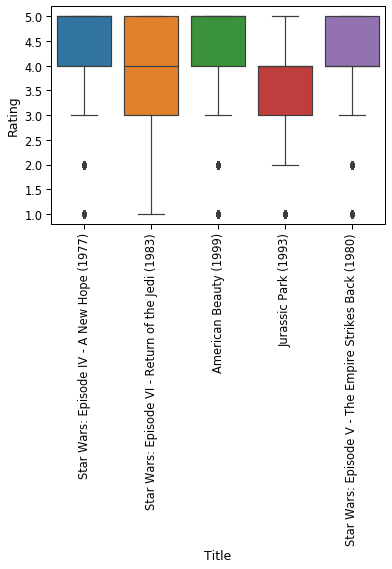

In [46]:
#Top five movies in dataset
top_five_movies = users_ratings_movies_df.groupby(['Title','Genres'])['Genres','Rating']
top_five_movies = top_five_movies.agg({'count','mean'})
top_five_movies.columns = ['Number of Rating', 'Average of Rating']
top_five_movies = top_five_movies.sort_values(['Number of Rating', 'Average of Rating'],ascending=False)
top_five_movies = top_five_movies.head()
top_five_movies
#first_movie = users_ratings_movies_df[users_ratings_movies_df['Title'] == 'Star Wars: Episode V - The Empire Strikes Back (1980)']
#sns.swarmplot(x='')
parent = users_ratings_movies_df.reset_index()
child  = top_five_movies.reset_index()
#parent[parent.Title.isin(child.Title)].Title.unique
s = sns.boxplot(x="Title", y="Rating", data=parent[parent.Title.isin(child.Title)])
#parent[parent.Title.isin(child.Title)].groupby(['Title']).count()
s.set_xticklabels(s.get_xticklabels(),rotation=90)

# Review five popular genre monthly trends on each year

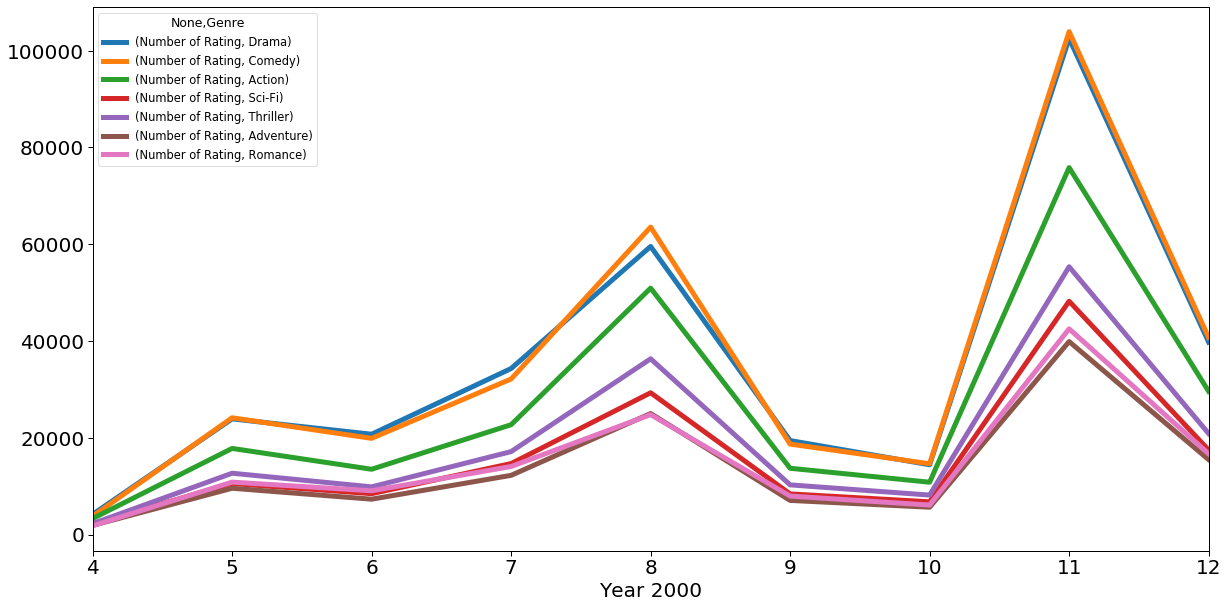

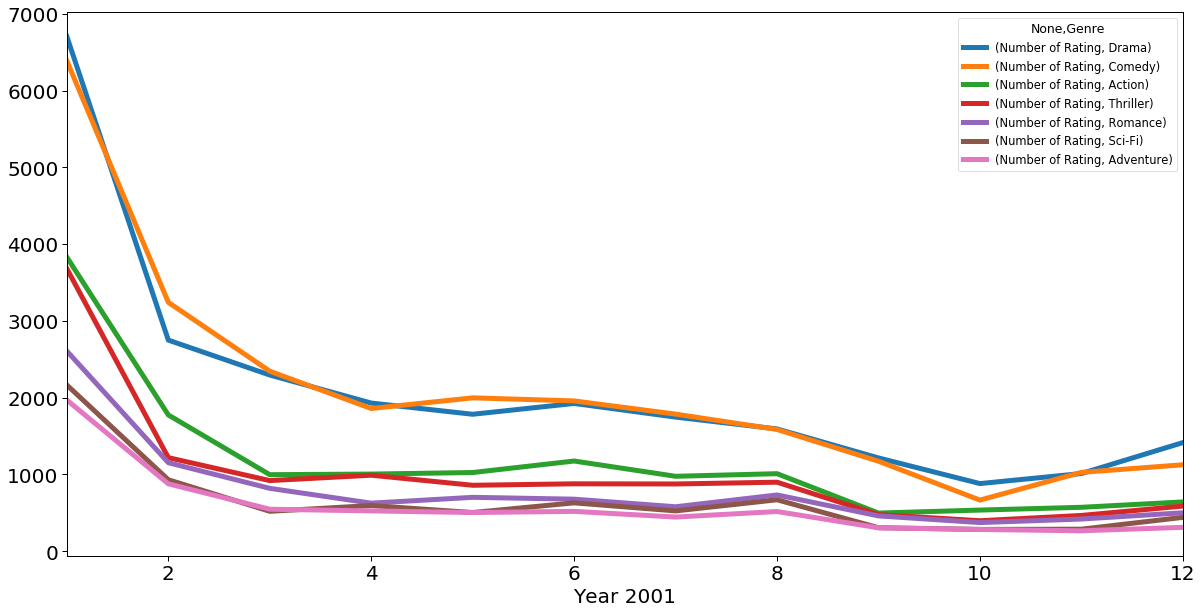

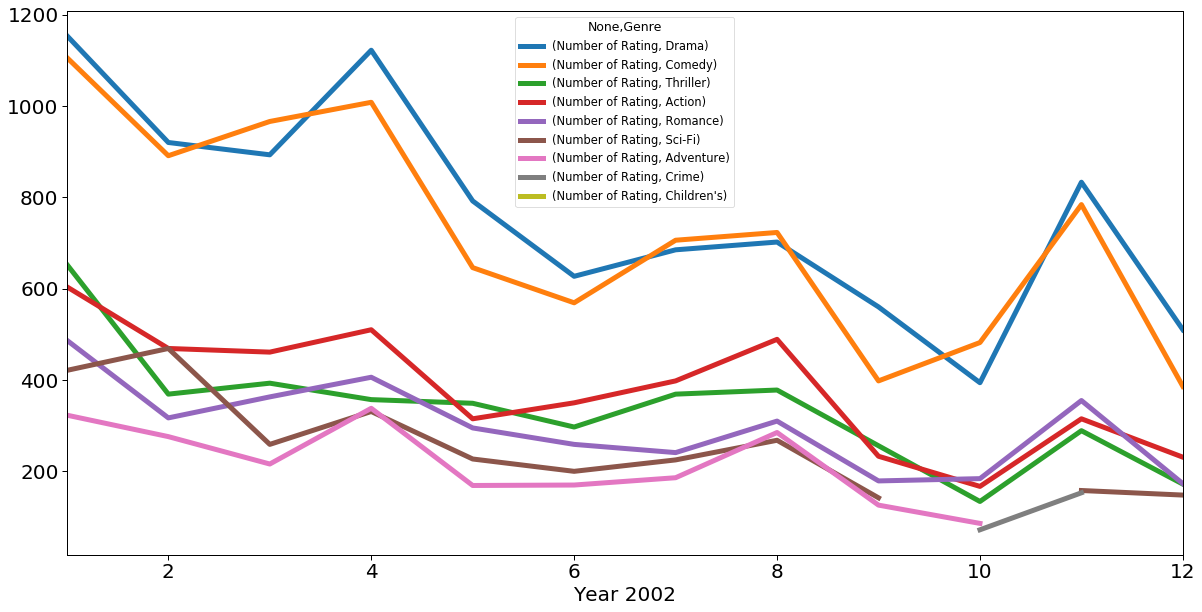

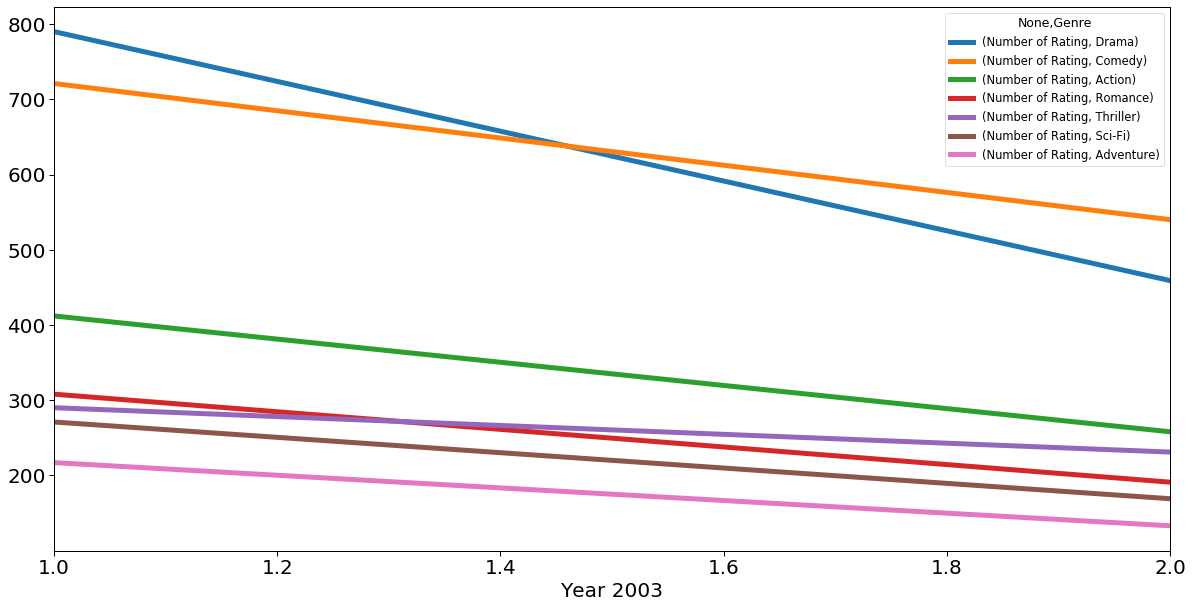

In [48]:
#monthly_users_ratings_movies_df = pd.DataFrame()
#monthly_users_ratings_movies_df = monthly_users_ratings_movies_df.drop(['Timestamp'],axis=1)
monthly_users_ratings_movies_df = pd.merge(users_ratings_movies_df_separated_genre,ratings[['UserID','MovieID','Timestamp']],how='inner',on=['UserID','MovieID'])

# #Extract Month from timestamp column
monthly_users_ratings_movies_df=monthly_users_ratings_movies_df.rename(columns = {'Timestamp':'Month'})
monthly_users_ratings_movies_df['Month'] = [datetime.fromtimestamp(timestamp).month for timestamp in monthly_users_ratings_movies_df['Month'] ] 




for year in monthly_users_ratings_movies_df['Year'].unique():
    _monthly_users_ratings_movies_df = monthly_users_ratings_movies_df[monthly_users_ratings_movies_df.Year == year]
    _monthly_users_ratings_movies_df = _monthly_users_ratings_movies_df.groupby(['Month','Genre'])['Rating']
    _monthly_users_ratings_movies_df = _monthly_users_ratings_movies_df.agg({'count'})
    _monthly_users_ratings_movies_df.columns = ['Number of Rating']
    _monthly_users_ratings_movies_df = _monthly_users_ratings_movies_df.sort_values(['Month','Number of Rating'],ascending=[True,False])
    _monthly_users_ratings_movies_df = _monthly_users_ratings_movies_df.groupby(level=0).head(7)

    months_dict = {  1:  "Jan",2:  "Feb",3:  "Mar",
                        4:  "Apr",5:  "May",6:  "Jun",7:  "Jul",
                        8:  "Aug",9:  "Sep",10:  "Oct",11:  "Nov",12:  "Dec"}

    #monthly_users_ratings_movies_df2000['Month'] = monthly_users_ratings_movies_df2000['Month'].map(months_dict)

    _monthly_users_ratings_movies_df = _monthly_users_ratings_movies_df.unstack()
    #_monthly_users_ratings_movies_df

    _monthly_users_ratings_movies_df.plot(figsize=(20,10), linewidth=5, fontsize=20)
    plt.xlabel('Year ' + str(year), fontsize=20);

# Correlation between number of ratings and average of ratings

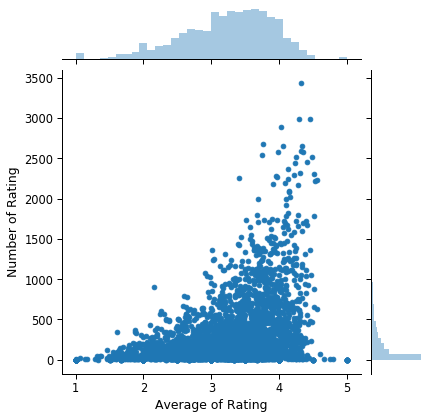

In [50]:
count_mean_rating_df = users_ratings_movies_df.groupby(['Title'])['Title','Rating']
count_mean_rating_df = count_mean_rating_df.agg({'count','mean'})
count_mean_rating_df.columns = ['Number of Rating', 'Average of Rating']
count_mean_rating_df = count_mean_rating_df.sort_values(['Number of Rating', 'Average of Rating'],ascending=False)
#count_mean_rating_df
sns.jointplot(x='Average of Rating', y='Number of Rating', data=count_mean_rating_df)

**There is a very small correlation between Rating Count and Rating Average. A large number of rating on a particular movie does not necessarily imply that the movie is good.**